# Train cycleGAN

Scripts to train cycleGAN were adopted from the [cycleGAN repository](https://github.com/eriklindernoren/PyTorch-GAN#cyclegan) that were based on the [Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks](https://arxiv.org/pdf/1703.10593.pdf) paper.

The scripts were modified to:
1. Use fully connected networks as opposed to convoultional neural networks
2. Input gene expression data as opposed to image data

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from numpy.random import seed
import umap
from sklearn.manifold import TSNE

randomState = 123
seed(randomState)

## Train Step 1

In [6]:
exp_index = 9
num_samples = 50000
data_version = "v2"


In [17]:
!python functions/delete.py --exp_index $exp_index

In [18]:
!python functions/cyclegan_transcript.py --dataset_nameA "L1000" --dataset_nameB "ARCHS4" --n_epochs 100 --decay_epoch 50 --input_dimA 962 --hidden_dimA 512 --output_dimA 128 --input_dimB 962 --hidden_dimB 512 --output_dimB 128   --num_samples $num_samples --batch_size 100 --exp_index $exp_index --data_version $data_version

Namespace(b1=0.9, b2=0.999, batch_size=100, cell_line=None, checkpoint_interval=10, data_version='v2', dataset_nameA='L1000', dataset_nameB='ARCHS4', decay_epoch=50, epoch_resume=0, eval_dataset_nameA='GTEx', eval_dataset_nameB='GTEx', evaluation=False, exp_index=8, gamma=0.1, hidden_dimA=512, hidden_dimB=512, input_dimA=962, input_dimB=962, ispredicting=False, lambda_cyc=10.0, lambda_id=5.0, load_model_index=100, lr=0.0002, n_cpu=8, n_epochs=100, n_residual_blocks=1, num_samples=50000, output_dimA=128, output_dimB=128, sample_interval=100, shuffle=False)
Cuda available True
../data/processed/L1000/L1000_filtered_GSE92742_Broad_LINCS_Level3_INF_mlr12k_n50000x962.f
../data/processed/ARCHS4/human_matrix_v9_filtered_n50000x962_v2.f
                    AARS         ABCB6  ...        ZNF589          ZW10
index                                   ...                            
GSM741172   2.163888e+00  1.856169e+00  ...  9.348032e-01  1.165740e+00
GSM678413   1.534354e+00 -2.242457e-08  ...  

# Train Step 2

In [50]:
!python functions/delete.py --exp_index $exp_index --step2

In [51]:
!python functions/extrapolation_transcript.py --input_dataset_name "ARCHS4_50000_input" --output_dataset_name "ARCHS4_50000_output" --n_epochs 100 --decay_epoch 10 --input_dim 962 --hidden_dim 2048 4096 8192 --output_dim 25312 --num_samples $num_samples --batch_size 100 --exp_index $exp_index --valid_ratio 0.01 --test_ratio 0.01 --y_pred_output_filename "y_pred.txt" --y_true_output_filename "y_true.txt" --early_stopping --early_stopping_epoch 3 --early_stopping_tol 0.0001
# 

wandb: Currently logged in as: mjjeon (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.21 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.10.10
wandb: Syncing run super-fog-75
wandb: ⭐️ View project at https://wandb.ai/mjjeon/L1000toRNAseq_step2
wandb: 🚀 View run at https://wandb.ai/mjjeon/L1000toRNAseq_step2/runs/2q8b5fin
wandb: Run data is saved locally in /home/maayanlab/Projects/minji/cycleGAN_gene_expression/scripts/wandb/run-20210308_164544-2q8b5fin
wandb: Run `wandb off` to turn off syncing.

Namespace(b1=0.9, b2=0.999, batch_size=100, cell_line=None, checkpoint_interval=10, decay_epoch=10, early_stopping=True, early_stopping_epoch=3, early_stopping_tol=0.0001, epoch_resume=0, eval_exp_index=8, eval_input_dataset_name='GTEx', eval_input_filename='y_pred_L1000_MCF7.txt', eval_output_dataset_name='GTEx', exp_index=9, gamma=0.5, hidden_dim=[2048, 4096, 8192], input_dataset_name='ARCHS4_500

# Predict

In [81]:
step1_exp_index = 9
step2_exp_index = 9

# step1_y_true_filename = "y_true_L1000_MCF7.txt"
# step1_y_pred_filename = "y_pred_L1000_MCF7.txt"
# step2_y_true_filename = "y_true_ARCHS4_MCF7.txt"
# step2_y_pred_filename = "y_pred_ARCHS4_MCF7.txt"
# eval_dataset_nameA = "L1000_MCF7"
# eval_dataset_nameB = "ARCHS4_MCF7_landmark"
# eval_output_dataset_name = "ARCHS4_MCF7"

step1_y_true_filename = "y_true_L1000_GTEx.txt"
step1_y_pred_filename = "y_pred_L1000_GTEx.txt"
step2_y_true_filename = "y_true_ARCHS4_GTEx.txt"
step2_y_pred_filename = "y_pred_ARCHS4_GTEx.txt"
eval_dataset_nameA = "GTEx_L1000"
eval_dataset_nameB = "GTEx_RNAseq_landmark"
eval_output_dataset_name = "GTEx_RNAseq"



## Predict-Step1

In [79]:
!python functions/cyclegan_transcript.py --eval_dataset_nameA $eval_dataset_nameA --ispredicting --exp_index $step1_exp_index --load_model_index 90 --data_version $data_version --y_true_output_filename $step1_y_true_filename --y_pred_output_filename $step1_y_pred_filename

{'epoch_resume': 0, 'n_epochs': 100, 'dataset_nameA': 'L1000', 'dataset_nameB': 'ARCHS4', 'batch_size': 100, 'lr': 0.0002, 'b1': 0.9, 'b2': 0.999, 'decay_epoch': 50, 'n_cpu': 8, 'input_dimA': 962, 'hidden_dimA': 512, 'output_dimA': 128, 'input_dimB': 962, 'hidden_dimB': 512, 'output_dimB': 128, 'num_samples': 50000, 'sample_interval': 100, 'checkpoint_interval': 10, 'n_residual_blocks': 1, 'lambda_cyc': 10.0, 'lambda_id': 5.0, 'load_model_index': 100, 'eval_dataset_nameA': 'GTEx', 'eval_dataset_nameB': 'GTEx', 'exp_index': 9, 'ispredicting': False, 'cell_line': None, 'gamma': 0.1, 'shuffle': False, 'evaluation': False, 'data_version': 'v2'}
Namespace(b1=0.9, b2=0.999, batch_size=1, cell_line=None, checkpoint_interval=10, data_version='v2', dataset_nameA='L1000', dataset_nameB='L1000', decay_epoch=100, epoch_resume=0, eval_dataset_nameA='GTEx_L1000', eval_dataset_nameB='GTEx', evaluation=False, exp_index=9, gamma=0.1, hidden_dimA=512, hidden_dimB=512, input_dimA=962, input_dimB=962, isp

In [66]:
!python functions/cyclegan_transcript.py --eval_dataset_nameA $eval_dataset_nameA --eval_dataset_nameB $eval_dataset_nameB --ispredicting --exp_index $step1_exp_index --load_model_index 90 --data_version $data_version --y_true_output_filename $step1_y_true_filename --y_pred_output_filename $step1_y_pred_filename --evaluation

{'epoch_resume': 0, 'n_epochs': 100, 'dataset_nameA': 'L1000', 'dataset_nameB': 'ARCHS4', 'batch_size': 100, 'lr': 0.0002, 'b1': 0.9, 'b2': 0.999, 'decay_epoch': 50, 'n_cpu': 8, 'input_dimA': 962, 'hidden_dimA': 512, 'output_dimA': 128, 'input_dimB': 962, 'hidden_dimB': 512, 'output_dimB': 128, 'num_samples': 50000, 'sample_interval': 100, 'checkpoint_interval': 10, 'n_residual_blocks': 1, 'lambda_cyc': 10.0, 'lambda_id': 5.0, 'load_model_index': 100, 'eval_dataset_nameA': 'GTEx', 'eval_dataset_nameB': 'GTEx', 'exp_index': 9, 'ispredicting': False, 'cell_line': None, 'gamma': 0.1, 'shuffle': False, 'evaluation': False, 'data_version': 'v2'}
Namespace(b1=0.9, b2=0.999, batch_size=1, cell_line=None, checkpoint_interval=10, data_version='v2', dataset_nameA='L1000', dataset_nameB='L1000', decay_epoch=100, epoch_resume=0, eval_dataset_nameA='L1000_MCF7', eval_dataset_nameB='ARCHS4_MCF7_landmark', evaluation=True, exp_index=9, gamma=0.1, hidden_dimA=512, hidden_dimB=512, input_dimA=962, inpu

## Predict-Step 2

In [80]:
!python functions/extrapolation_transcript.py --eval_input_dataset_name "step1" --eval_output_dataset_name $eval_output_dataset_name --ispredicting --exp_index $step2_exp_index --y_true_output_filename $step2_y_true_filename --y_pred_output_filename $step2_y_pred_filename --eval_exp_index $step1_exp_index --eval_input_filename $step1_y_pred_filename

{'epoch_resume': 0, 'n_epochs': 100, 'input_dataset_name': 'ARCHS4_50000_input', 'output_dataset_name': 'ARCHS4_50000_output', 'batch_size': 100, 'lr': 0.0002, 'b1': 0.9, 'b2': 0.999, 'decay_epoch': 10, 'n_cpu': 8, 'input_dim': 962, 'hidden_dim': [2048, 4096, 8192], 'output_dim': 25312, 'num_samples': 50000, 'sample_interval': 100, 'checkpoint_interval': 10, 'eval_input_dataset_name': 'GTEx', 'eval_output_dataset_name': 'GTEx', 'eval_exp_index': 8, 'eval_input_filename': 'y_pred_L1000_MCF7.txt', 'exp_index': 9, 'ispredicting': False, 'cell_line': None, 'gamma': 0.5, 'shuffle': False, 'valid_ratio': 0.01, 'test_ratio': 0.01, 'y_true_output_filename': 'y_true.txt', 'y_pred_output_filename': 'y_pred.txt', 'early_stopping': True, 'early_stopping_epoch': 3, 'early_stopping_tol': 0.0001}
Namespace(b1=0.9, b2=0.999, batch_size=1, cell_line=None, checkpoint_interval=10, decay_epoch=100, early_stopping=False, early_stopping_epoch=3, early_stopping_tol=0.1, epoch_resume=0, eval_exp_index=9, eval

In [70]:
!python functions/extrapolation_transcript.py --eval_input_dataset_name "ARCHS4_MCF7_landmark" --eval_output_dataset_name $eval_output_dataset_name --ispredicting --exp_index $step2_exp_index --y_true_output_filename $step2_y_true_filename --y_pred_output_filename $step2_y_pred_filename --eval_exp_index $step1_exp_index --eval_input_filename $step1_y_pred_filename 

{'epoch_resume': 0, 'n_epochs': 100, 'input_dataset_name': 'ARCHS4_50000_input', 'output_dataset_name': 'ARCHS4_50000_output', 'batch_size': 100, 'lr': 0.0002, 'b1': 0.9, 'b2': 0.999, 'decay_epoch': 10, 'n_cpu': 8, 'input_dim': 962, 'hidden_dim': [2048, 4096, 8192], 'output_dim': 25312, 'num_samples': 50000, 'sample_interval': 100, 'checkpoint_interval': 10, 'eval_input_dataset_name': 'GTEx', 'eval_output_dataset_name': 'GTEx', 'eval_exp_index': 8, 'eval_input_filename': 'y_pred_L1000_MCF7.txt', 'exp_index': 9, 'ispredicting': False, 'cell_line': None, 'gamma': 0.5, 'shuffle': False, 'valid_ratio': 0.01, 'test_ratio': 0.01, 'y_true_output_filename': 'y_true.txt', 'y_pred_output_filename': 'y_pred.txt', 'early_stopping': True, 'early_stopping_epoch': 3, 'early_stopping_tol': 0.0001}
Namespace(b1=0.9, b2=0.999, batch_size=1, cell_line=None, checkpoint_interval=10, decay_epoch=100, early_stopping=False, early_stopping_epoch=3, early_stopping_tol=0.1, epoch_resume=0, eval_exp_index=9, eval

## Plot

In [55]:
# Read in loss files
G_loss_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "output", str(step1_exp_index),"logs", "G_loss.txt")

D_loss_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "output", str(step1_exp_index),"logs", "D_loss.txt")

with open(G_loss_file, "r") as f:
    G_loss = [x.strip() for x in f.readlines()]
with open(D_loss_file, "r") as f:
    D_loss = [x.strip() for x in f.readlines()]


G_loss_data = pd.DataFrame(G_loss, dtype="float64")
D_loss_data = pd.DataFrame(D_loss, dtype="float64")#pd.read_csv(D_loss_file, header=None, sep=',').T

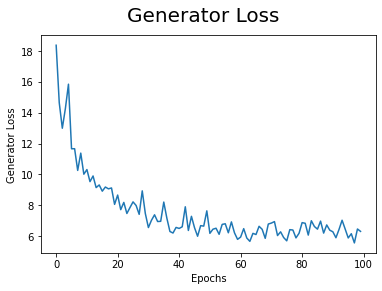

In [56]:
# Generator loss
G_loss_out_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "output",str(step1_exp_index),"viz", "G_loss_plot.jpg")

fig = plt.figure()
plt.plot(G_loss_data.index.tolist(), G_loss_data.iloc[:, 0].values)
fig.suptitle('Generator Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Generator Loss')
fig.savefig(G_loss_out_file)

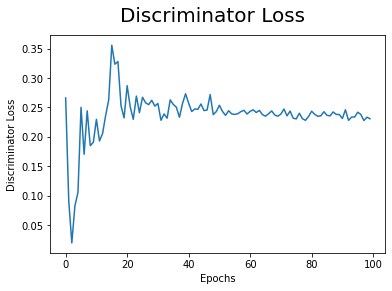

In [57]:
# Discriminator loss
D_loss_out_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "output",str(step1_exp_index),"viz","D_loss_plot.jpg")

fig = plt.figure()
plt.plot(D_loss_data.index.tolist(), D_loss_data.iloc[:, 0].values)
fig.suptitle('Discriminator Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Discriminator Loss')
fig.savefig(D_loss_out_file)

# Plotting

## Plotting-Step1

In [67]:
# plot results
y_true = pd.read_csv(f"../output/{step1_exp_index}/prediction/{step1_y_true_filename}", sep="\t", header=None)
y_pred = pd.read_csv(f"../output/{step1_exp_index}/prediction/{step1_y_pred_filename}", sep="\t", header=None)
# y_input = pd.read_csv(f"../output_step2/{exp_index}/prediction/y_input.txt", sep="\t", header=None)

# shuffled_y_true = pd.read_csv(f"../output/{exp_index}/prediction/shuffle_y_true.txt", sep="\t", header=None)
# shuffled_y_pred = pd.read_csv(f"../output/{exp_index}/prediction/shuffle_y_pred.txt", sep="\t", header=None)

print(f"../output/{step1_exp_index}/prediction/{step1_y_pred_filename}")


../output/9/prediction/y_pred_L1000_MCF7.txt


       y_true    y_pred
0    2.507228  2.285759
1    1.598097  1.767613
2    2.155578  1.740286
3    2.166666  1.853540
4    1.878764  1.953254
..        ...       ...
957  1.666530  1.555703
958  1.687001  1.552905
959  0.986654  0.951418
960  1.008123  1.225884
961  1.327176  1.355527

[962 rows x 2 columns]
0.6222650454548999


<AxesSubplot:xlabel='y_true', ylabel='y_pred'>

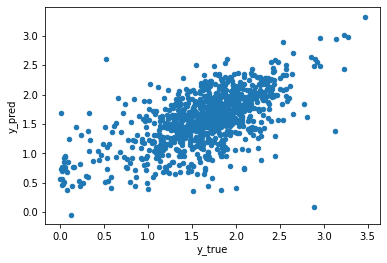

In [68]:
y_true_avg = y_true.mean()
y_pred_avg = y_pred.mean()
tmpdf = pd.DataFrame([y_true_avg.tolist(), y_pred_avg.tolist()]).T
tmpdf.columns = ["y_true", "y_pred"]
print(tmpdf)
print(pearsonr(y_true_avg.tolist(), y_pred_avg.tolist())[0])
tmpdf.plot.scatter(x='y_true', y='y_pred')


## Plotting-Step2

In [71]:
# plot results
y_true = pd.read_csv(f"../output_step2/{step2_exp_index}/prediction/{step2_y_true_filename}", sep="\t", header=None)
y_pred = pd.read_csv(f"../output_step2/{step2_exp_index}/prediction/{step2_y_pred_filename}", sep="\t", header=None)
# y_input = pd.read_csv(f"../output_step2/{exp_index}/prediction/y_input.txt", sep="\t", header=None)

# shuffled_y_true = pd.read_csv(f"../output/{exp_index}/prediction/shuffle_y_true.txt", sep="\t", header=None)
# shuffled_y_pred = pd.read_csv(f"../output/{exp_index}/prediction/shuffle_y_pred.txt", sep="\t", header=None)

print(f"../output_step2/{step2_exp_index}/prediction/{step2_y_true_filename}")


../output_step2/9/prediction/y_true_ARCHS4_MCF7.txt


In [72]:
print(y_true.shape)

(203, 25312)


         y_true    y_pred
0      0.889105  0.804848
1      0.077623  0.027595
2      0.249356  0.094078
3      0.347731  0.425402
4      0.317189  0.206941
...         ...       ...
25307  0.006925  0.012523
25308  0.014776  0.033028
25309  0.012928  0.041925
25310  0.099087  0.107633
25311  0.259020  0.279426

[25312 rows x 2 columns]
0.9980054219113759


<AxesSubplot:xlabel='y_true', ylabel='y_pred'>

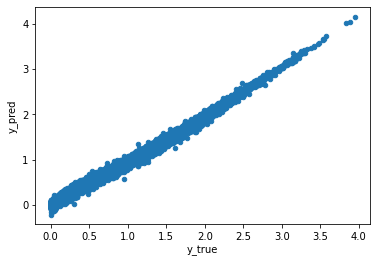

In [73]:
y_true_avg = y_true.mean()
y_pred_avg = y_pred.mean()
tmpdf = pd.DataFrame([y_true_avg.tolist(), y_pred_avg.tolist()]).T
tmpdf.columns = ["y_true", "y_pred"]
print(tmpdf)
print(pearsonr(y_true_avg.tolist(), y_pred_avg.tolist())[0])
tmpdf.plot.scatter(x='y_true', y='y_pred')


         y_true    y_pred
0      0.499148  2.736464
1      0.077632  0.196670
2      0.146216  0.918372
3      0.091057  0.931883
4      0.181177  0.328915
...         ...       ...
25307  0.000000  0.409312
25308  0.077632  0.619025
25309  0.000000  0.219646
25310  0.077632  0.384133
25311  0.232676  1.181134

[25312 rows x 2 columns]
0.830328039727717


<AxesSubplot:xlabel='y_true', ylabel='y_pred'>

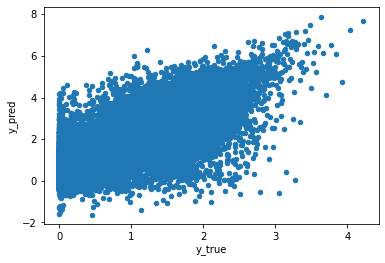

In [63]:
i = 0
y_true_avg = y_true.mean()
y_pred_avg = y_pred.mean()
tmpdf = pd.DataFrame([y_true.iloc[i, :].tolist(), y_pred.iloc[i, :].tolist()]).T
tmpdf.columns = ["y_true", "y_pred"]
print(tmpdf)
print(pearsonr(y_true.iloc[i, :].tolist(), y_pred.iloc[i, :].tolist())[0])
tmpdf.plot.scatter(x='y_true', y='y_pred')

In [150]:
# evaluation
from scipy import stats
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import r2_score, mean_squared_error, matthews_corrcoef, accuracy_score, roc_auc_score

def get_scores_here(y_true, y_pred):

    scores_dict = dict()

    scores_dict["r2"] = list()
    scores_dict["rmse"] = list()
    scores_dict["pearson"] = list()
    scores_dict["spearmanr"] = list()
    for i in range(len(y_true)):
        tmp_y_true = y_true[i]
        tmp_y_pred = y_pred[i]
        scores_dict["r2"].append(r2_score(tmp_y_true, tmp_y_pred))
        scores_dict["rmse"].append(mean_squared_error(tmp_y_true, tmp_y_pred, squared=False))
        scores_dict["pearson"].append(pearsonr(tmp_y_true, tmp_y_pred)[0])
        scores_dict["spearmanr"].append(spearmanr(tmp_y_true, tmp_y_pred)[0])

    return scores_dict

In [151]:
scores_df = pd.DataFrame(get_scores_here(y_true.values, y_pred.values))
shuffled_scores_df = pd.DataFrame(get_scores_here(shuffled_y_true.values, shuffled_y_pred.values))
input_and_output_scores_df = pd.DataFrame(get_scores_here(y_input.values, y_true.values))

scores_df = pd.concat([scores_df, shuffled_scores_df, input_and_output_scores_df], axis=1)
pearson_df = scores_df["pearson"]
spearman_df = scores_df["spearmanr"]
rmse_df = scores_df["rmse"]

column_names = ["CycleGAN", "Random", "Paired GTEx"]
pearson_df.columns = column_names
spearman_df.columns = column_names
rmse_df.columns = column_names



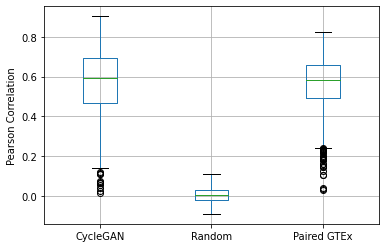

In [152]:
pearson_df.boxplot(column=column_names)
plt.ylabel("Pearson Correlation")
plt.savefig(f"../output/{exp_index}/viz/pearson_corr.png")

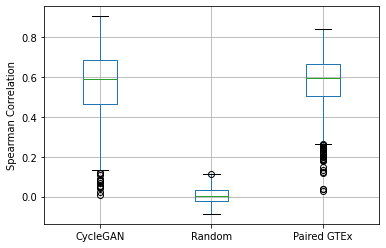

In [153]:
spearman_df.boxplot(column=column_names)
plt.ylabel("Spearman Correlation")
plt.savefig(f"../output/{exp_index}/viz/spearman_corr.png")

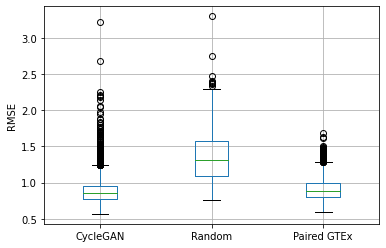

In [154]:
rmse_df.boxplot(column=column_names)
plt.ylabel("RMSE")
plt.savefig(f"../output/{exp_index}/viz/rmse.png")

In [ ]:
y_true.iloc[:10, :5].T.plot.line()

In [ ]:
pearsonr(y_pred.mean(), y_pred.iloc[i, :].values)[0]

In [ ]:
y_pred.iloc[:10, :5].T.plot.line()

In [ ]:
exp_index = 7
num_samples = 50000
cell_line = "MCF7"

%run functions/cyclegan_transcript.py --dataset_nameA "pseudomonas" --dataset_nameB "pseudomonas" --n_epochs 100 --decay_epoch 50 --input_dim 5549 --hidden_dim 1000 --output_dim 128 --num_samples 10000 --batch_size 100 --exp_index $exp_index

In [ ]:
tsne = TSNE(n_components=2)
u = tsne.fit_transform(pd.concat([y_true, y_pred, y_input]))
labels = ["True RNA-seq"]*len(y_true)
labels.extend(["Pred RNA_seq"]*len(y_pred))
# labels.extend(["Input L1000"]*len(y_input))

colors = ["red"]*len(y_true)
colors.extend(["blue"]*len(y_pred))
colors.extend(["yellow"]*len(y_input))
plt.scatter(u[:,0], u[:,1], c=colors)

In [ ]:
fit = umap.UMAP()
u = fit.fit_transform(y_true)
plt.scatter(u[:,0], u[:,1])